<h1>K Nearest Neighbors</h1>

<h3>Basic info:</h3>
<li> Algorithm classifies new objects based on class of majority and k of his closest neighbors.
<li> It's example of supervised learning.
<li> It's really simply method but it isn't fast so it may not be best choice when dealing with a lot of data.
<li> It works in multi dimensional datasets.

<h3>How to choose k value</h3>
<li> k should be even number if number of classes is odd. Otherwise k should be even.
<li> k should be greater than number of classes.

<h3>Alternative metrics</h3>
<li> Euclidean distance
<li> Manhattan distance




<h2>Import stuff</h2>

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

<h4> Configure matplotlib </h4>

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

<h2>Implementing metrics</h2>

Euclidean metrics:
$$
  d = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + \ldots + (a_n - b_n)^2 }
$$

In [3]:
def EuclideanMetrics(p1, p2) -> float:
    d = 0
    for a, b in zip(p1,p2):
        d += (a - b) ** 2
    return np.sqrt(d)

<h4> Manhattan metrics </h4>

$$
d = \sum^n_{i=0}|p1_i - p2_i|
$$

In [4]:
def ManhattanMetrics(p1, p2) -> float:
    d = 0
    for a, b in zip (p1, p2):
        d += np.abs(a - b)
    return d


<h4> Cosinus metrics </h4>

$$
cos (\theta) = \frac{a_x \cdot b_x + a_y \cdot b_y}{|a||b|}
$$
$$
d = 1 - cos(\theta)
$$

In [5]:
def CosinusMetrics(p1, p2) -> float:
    a =( p1[0] * p2[0] + p1[1] * p2[1] )/(np.linalg.norm(p1) + np.linalg.norm(p2))
    return 1 - a 

<h3> Normalization </h3>
<p>Normalization, in this case, is scaling data to range [0, 1]. It highly improves prediction accuracy of KNN algorithm.</p>

$$
    x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min} }
$$

In [6]:
def normalize(X):
    X_norm= (X - np.min(X, axis=0))/(np.max(X, axis=0) - np.min(X, axis=0))
    return X_norm

<h3>Split data </h3>
This function let us to split our dataset between train and test parts. This let us check accuracy of our algorithm

In [7]:
def train_test_split(X, y, train_ratio=0.75, seed=0):
    m = X.shape[0] # count of rows in data

    np.random.seed(seed)
    idx_perm = np.random.permutation(m)
    
    X = X[idx_perm]
    y = y[idx_perm]

    index = int(np.round(train_ratio * m))
    
    X_train = X[:index, :]
    X_test = X[index:, :] 
    y_train = y[:index]
    y_test = y[index:]
    return X_train, X_test, y_train, y_test

<h1>My KNN class

In [8]:
class KNN():
    def __init__(self, k=5, metric='Euclidean'):
        self.k_ = k
        self.metric_ = metric
    
    def fit(self, X, y):
        self.X_ = X.copy()
        self.y_ = y.copy()

    def predict(self, X) -> np.ndarray:
        predicted_values = []
        for x in X:
            # Calculate distance between x and trained points 
            distances = self.dist(x)
            # Sort all objects in X_ by distance to x 
            # and select k of them that are the closest to x
            closest_idx = np.argsort(distances)[:self.k_]
            # Return class that has majority of them
            predicted_values.append(max(self.y_[closest_idx]))
        return np.array(predicted_values)

    def dist(self, x) -> list:
        distances = []
        for x_trained in self.X_:
            if self.metric_ == "Euclidean":
                distances.append(EuclideanMetrics(x, x_trained))
            elif self.metric_ == "Manhattan":
                distances.append(ManhattanMetrics(x, x_trained))
            elif self.metric_ == "Cosinus":
                distances.append(CosinusMetrics(x, x_trained))
        return distances
    
    def score(self, X, y):
        y_predicted = self.predict(X)
        return sum(y_predicted == y)/len(y)




<h1>Examples</h1>

<h3>Classification Iris dataset<h3>

Firstly I'm gonna load Iris dataset, choose two features from there and normalize values.

Text(0.5, 1.0, 'Scattered plot of my train data by those two features')

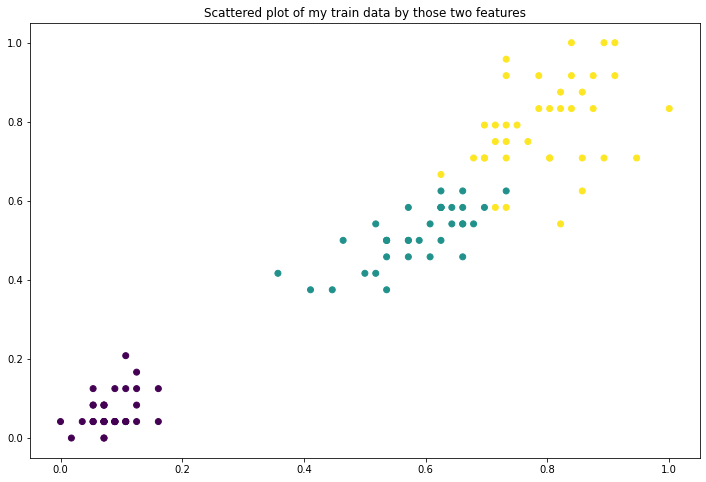

In [9]:
iris = datasets.load_iris()

X = iris.data[:, 2:4]  # for now I'll use only two features - just to simplify visualization
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, seed=0)
X_train = normalize(X_train)
X_test = normalize(X_test)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title("Scattered plot of my train data by those two features")

Score of predict from training data: 0.9821428571428571
Score of predict from test data: 0.9473684210526315


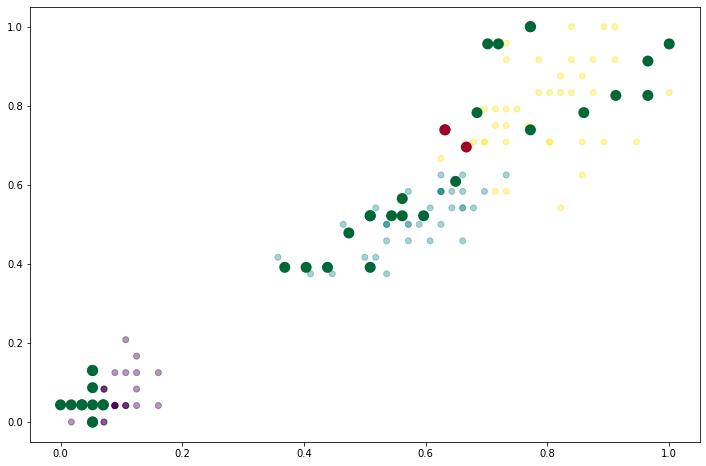

In [10]:
knn = KNN()
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
print(f"Score of predict from training data: {train_score}")
test_score = knn.score(X_test, y_test)
print(f"Score of predict from test data: {test_score}")

y_predicted = knn.predict(X_test)
is_prediction_accurate = (y_predicted == y_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha = 0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], linewidths = 5, c=is_prediction_accurate, cmap="RdYlGn")


<p> Transparent points are points I trained my model with. Non-transparend, bigger dots are classified points from test data. Objects classified correctly are green, ottherwise they're red.

<h3>Example 2 - cos metrics </h3>
<p>I took this example from book "Data Science Algorithms in a Week", by Dávid Natingga. I choose this one, because it uses cosinus metrics - something I've never used before.</p>
<p>
First column of data means how many times word "algorithm" occured per 1000 words in document. Second column counts how many times word "Computer" occured per 1000 words in document. Label column determines subject of particular document - is it about Math or IT.
</p>

In [11]:
X = [
    [153, 150],
    [105, 97],
    [75, 125],
    [81,84],
    [74, 78],
    [90, 63],
    [20, 0],
    [33, 0],
    [105, 10],
    [2, 0],
    [84, 2],
    [12, 0],
]

X = np.array(X)
y = [0]*6 + [1]*6
y = np.array(y)

x_to_predict = np.array([[41, 42]])

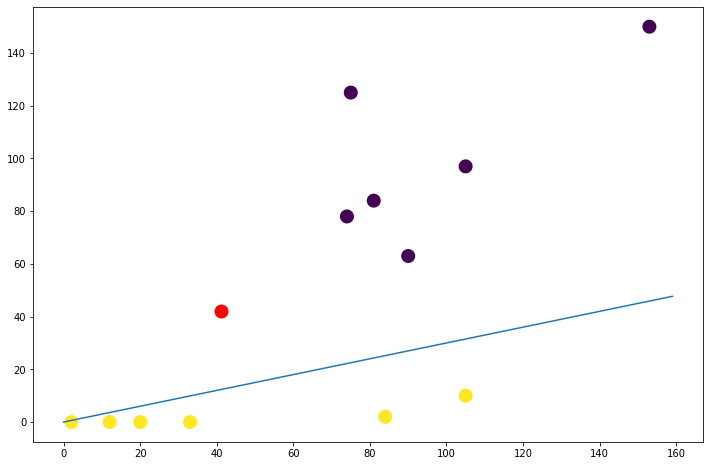

In [12]:
plt.scatter(X[:,0], X[:, 1], c=y, linewidths = 8)
plt.scatter(x_to_predict[:,0], x_to_predict[:,1], c = "red", linewidths = 8)
x_line = np.array(range(160))
y_line = 0.3*x_line
plt.plot(x_line, y_line)

<p>As we can see, our objects aren't in clusters, but all of our IT documents are above the line. Probably we should use other classification algorithm (Naive Bayes maybe) or we could use cosinus metric, that is calculated by angle, not by position. </p>

In [13]:
knn = KNN(metric="Cosinus")
knn.fit(X, y)
y_predicted = knn.predict(x_to_predict)
print(y_predicted)

[0]


<h3>Bibliography</h3>
<li> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<li>https://en.wikipedia.org/wiki/Taxicab_geometry
<li>https://aszokalski.github.io/AI/KNN.html
<li>Data Science Algorithms in a Week, Dávid Natingga, Packt